# 1、K-means Clustering

在这个练习中，您将实现K-means算法并将其用于图像压缩。通过减少图像中出现的颜色的数量，只剩下那些在图像中最常见的颜色。

## 1.1 Implementing K-means
### 1.1.1 Finding closest centroids（找到该数据最近的簇中心）
在K-means算法的分配簇的阶段，算法将每一个训练样本$x_i$分配给最接近的簇中心。

$$c^{(i)} := j $$ 
that minimizes
$$||x^{(i)} - μ_j||$$


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [27]:
def find_closest_centroids(X, centroids):
    """
    该函数接受数据矩阵X和聚类中心内所有中心的位置，并应输出一个一维数组idx，
    idx里面存储着该行数据距离最近簇的下标。
    """
    idx = []
    max_dist = 1000000  # 限制一下最大距离
    for i in range(len(X)):
        #print(X[i],centroids)
        minus = X[i] - centroids
        dist = minus[:, 0]**2 + minus[:, 1]**2
        if dist.min() < max_dist:
            ci = np.argmin(dist)  # numpy.argmin表示最小值在数组中所在的位置
            idx.append(ci)
    return np.array(idx)

In [28]:
mat = loadmat('ex7data2.mat')
X = mat['X']
init_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, init_centroids)
print(idx[0:3])

[0 2 1]


In [29]:
print(X[1])
test = X[1]-init_centroids
print(test)
dis_test = test[:, 0]**2 + test[:, 1]**2
print(dis_test)
pos_cluster = np.argmin(dis_test)
print(pos_cluster)

[5.65858312 4.79996405]
[[ 2.65858312  1.79996405]
 [-0.34141688  2.79996405]
 [-2.34141688 -0.20003595]]
[10.30793481  7.95636419  5.52224738]
2


In [30]:
idx.max()

2

### 1.1.2 Computing centroid means（计算新的簇中心坐标）
分配好每个点对应的簇中心，接下来要做的是，重新计算每个簇中心，为这个簇里面所有点位置的平均值。

$$μ_k := \frac{1}{|C_k|}\sum_{i \in C_k}x^{(i)}$$

$C_k$是我们分配好给簇中心点的样本集。

In [31]:
def compute_centroids(X, idx):
    centroids = []
    for i in range(len(np.unique(idx))): # len(np.unique(idx)) 为聚类中心的总数，i的取值是0，1，2
        u_k = X[idx==i].mean(axis=0) # 求每列的平均值，找到所有归属与簇1或者簇2或者簇0的所有店的中心位置。
        centroids.append(u_k)
    
    return np.array(centroids)

In [32]:
compute_centroids(X, idx)#根据新的数据分配，重新找的新的簇中心

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 1.1.3 重复1.1.1和1.1.2，直到簇中心不在改变

## 1.2 K-means on example dataset

### 基础语法知识，以便于大家理解plot_data的函数

In [33]:
# 1.assert，等价于if
a=2
b=2
assert a==b, 'a 不等于  b'

In [34]:
# 数组的访问
temp1 = np.array([[3, 3], [6, 2], [8, 5]])
print(temp1[0].shape[0])
print(temp1.shape[0])

2
3


In [35]:
# 数组的append
temp2 = np.array([[5,6],[7,8],[3,5],[3,4]])#如果temp2不是数组，那么for的程序将无法起到作用，值得注意的地方。
temp2_id = np.array([1,0,1,0])
print(temp2_id == 0)
sub_X=[]
for i in range(2):
    print(i)
    x_i = temp2[temp2_id == i]
    print(x_i)
    sub_X.append(x_i)
print(sub_X)#sub_X是列表，里面有2项，每项是一个array

[False  True False  True]
0
[[7 8]
 [3 4]]
1
[[5 6]
 [3 5]]
[array([[7, 8],
       [3, 4]]), array([[5, 6],
       [3, 5]])]


In [36]:
def plot_data(X, centroids, idx=None):
    #print("to")
    """
    可视化数据，并自动分开着色。
    idx: 最后一次迭代生成的idx向量，存储每个样本分配的簇中心点的值
    centroids: 记录了每次簇中心的坐标,是一个三维数组
    """
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']
    
    assert len(centroids[0]) <= len(colors), 'colors not enough'
    #print(X,idx,centroids)
    sub_X = []
    if idx is not None:
        for i in range(centroids[0].shape[0]):#centroids[0].shape[0]取的是簇个数
            #print(centroids[0].shape[0])
            x_i = X[idx == i]
            sub_X.append(x_i)
    else:
        sub_X = [X]#sub_x是三位数组
        
    plt.figure(figsize=(8,5))
    for i in range(len(sub_X)):
        xx = sub_X[i]
        plt.scatter(xx[:,0], xx[:,1], c=colors[i], label='Cluster {}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    
    # 画出中心点的移动轨迹
    xx, yy = [], []
    for centroid in centroids:
        xx.append(centroid[:, 0])
        yy.append(centroid[:, 1])
   
    plt.plot(xx, yy, 'rx--', markersize=8)

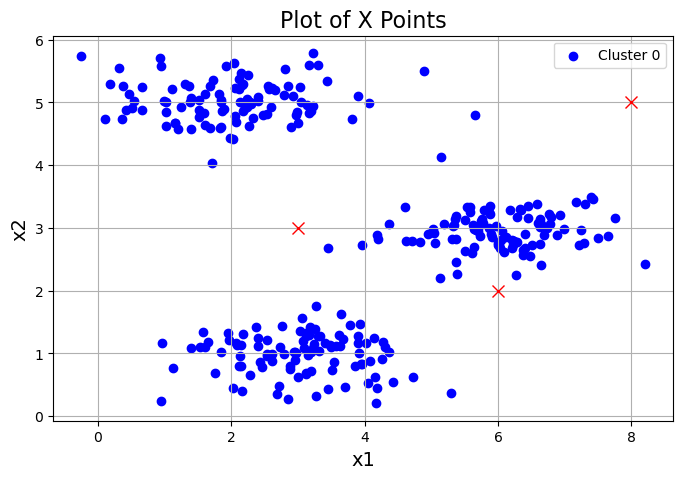

In [37]:
plot_data(X, [init_centroids])

In [38]:
def run_kmeans_realtime(X, centroids, max_iters):#动态显示效果
    K = len(centroids)  # 中心点总数
    
    centroids_all = []
    centroids_all.append(centroids)
    centroid_i = centroids
    plot_data(X, centroids_all)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroid_i)
        centroid_i = compute_centroids(X, idx)
        centroids_all.append(centroid_i)
        
        plot_data(X, centroids_all, idx)
    
    return idx, centroids_all
##centroids_all记录了每次簇中心的坐标,是一个三维数组，idx记录是最后一次每个数据所属的簇信息

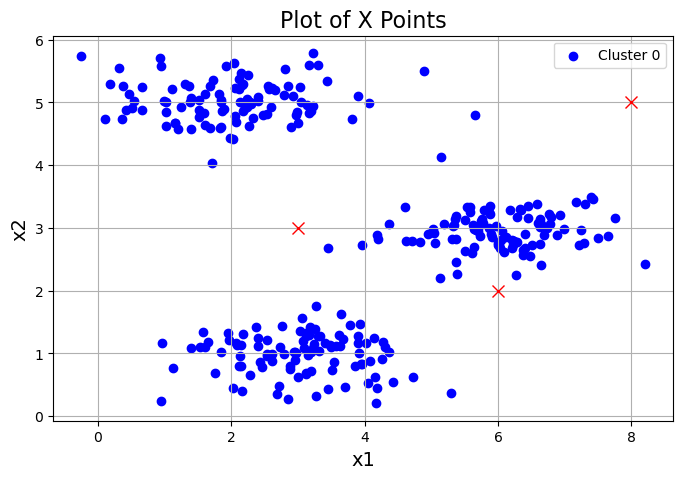

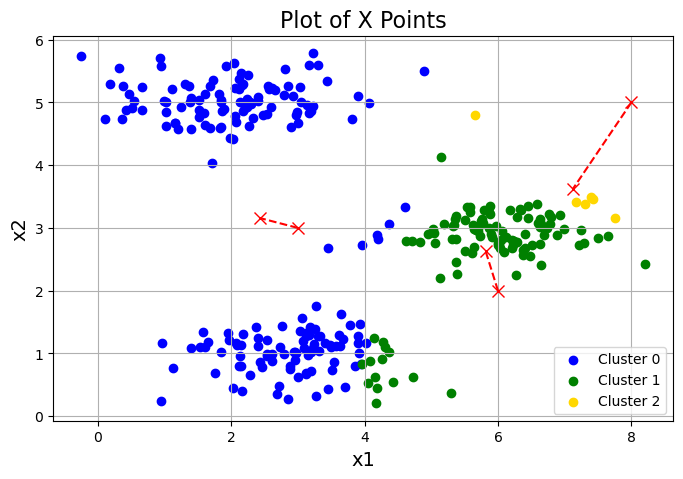

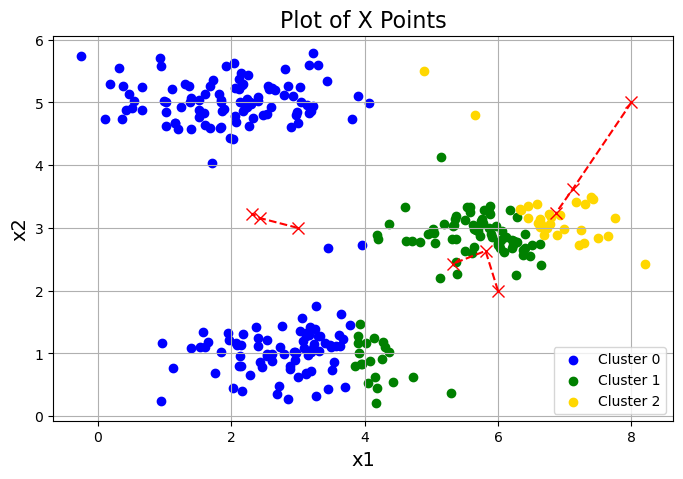

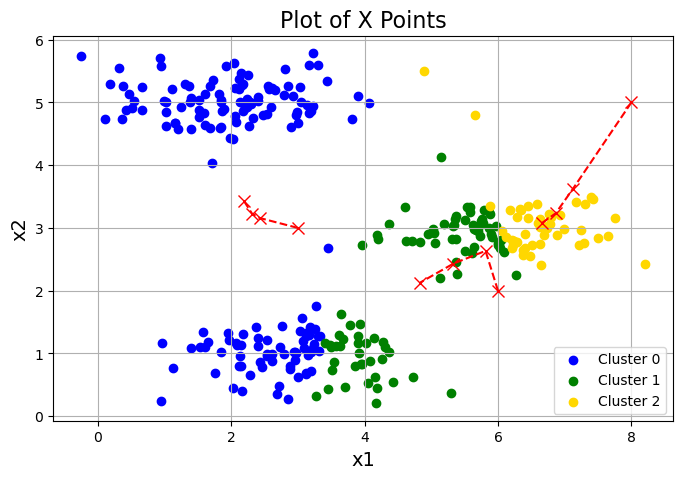

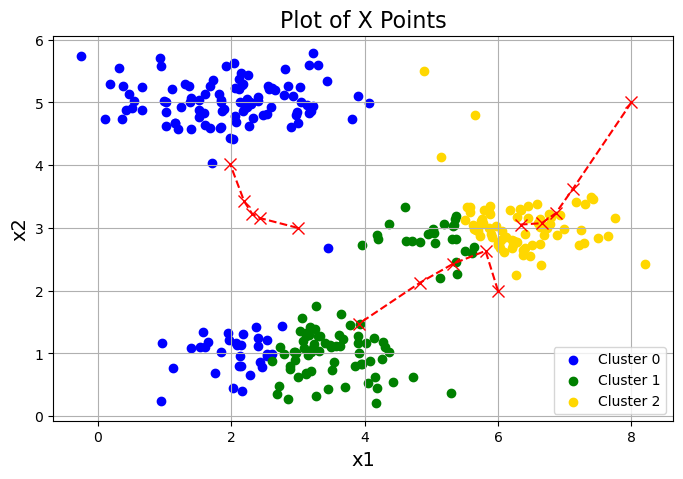

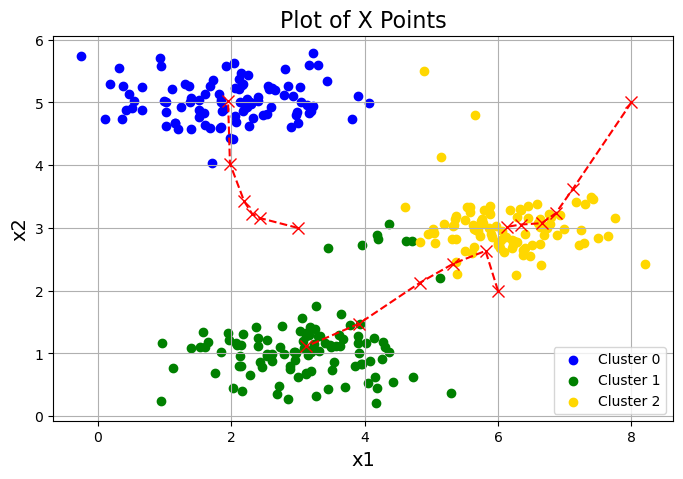

In [39]:
idx, centroids_all = run_kmeans_realtime(X, init_centroids, 5)
#plot_data(X, centroids_all, idx)

## 1.3 Random initialization
在实践中，对簇中心点进行初始化的一个好的策略就是从训练集中选择随机的例子。

In [40]:
##理解numpy的choice函数numpy.random.choice(a, size=None, replace=True, p=None)
#a: 采样的样本
#size: 采样的大小
#replace: 采样是否有放回
#p: 采样概率，None表示均匀采样
temp3 = np.array([[5,6],[7,8],[3,5],[3,4]])
m = temp3.shape[0]
np.random.choice(m, 2)

array([2, 3])

In [41]:
a = [1, 1, 2, 3, 4, 5]
test1 = np.random.choice(a, 3, replace=False)#replace: 采样是否有放回
test2 = np.random.choice(a, 3, replace=True)
print(test1,test2)

[2 1 1] [4 3 4]


In [42]:
def init_centroids(X,K):
    """
    随机初始化
    """
    m, n = X.shape
    
    idx = np.random.choice(m, K, replace=False)
   # print(idx)
   # print("---")
    centroids = X[idx]
    #print(centroids)
    return centroids#寻找K个簇中心点坐标，并存入centroids

In [43]:
def run_kmeans(X, centroids, max_iters):#动态显示效果
    K = len(centroids)  # 中心点总数
    
    centroids_all = []
    centroids_all.append(centroids)
    centroid_i = centroids
    #plot_data(X, centroids_all)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroid_i)
        centroid_i = compute_centroids(X, idx)
        centroids_all.append(centroid_i)
        
        #plot_data(X, centroids_all, idx)
    
    return idx, centroids_all
##centroids_all记录了每次簇中心的坐标,是一个三维数组，idx记录是最后一次每个数据所属的簇信息

进行三次随机初始化，看下各自的效果。会发现有些效果并不理想，这是正常的，落入了局部最优。

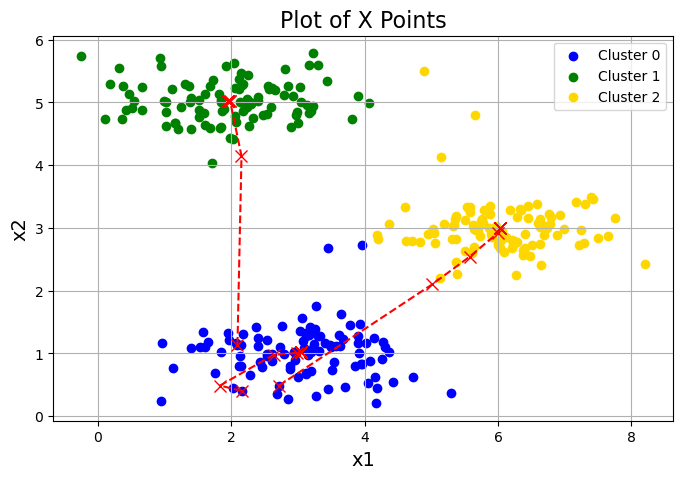

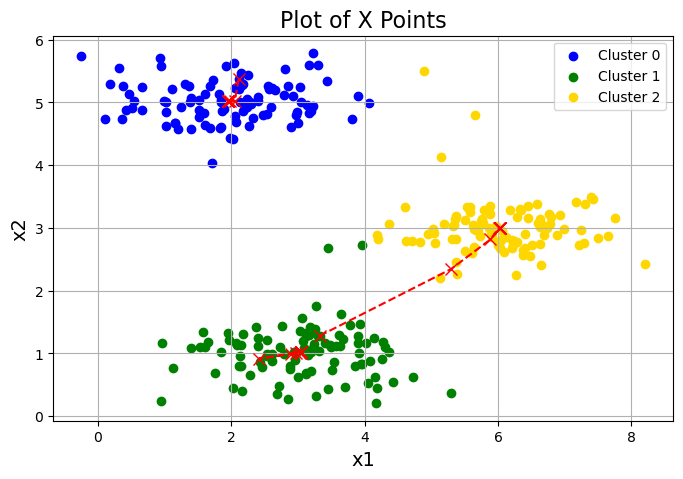

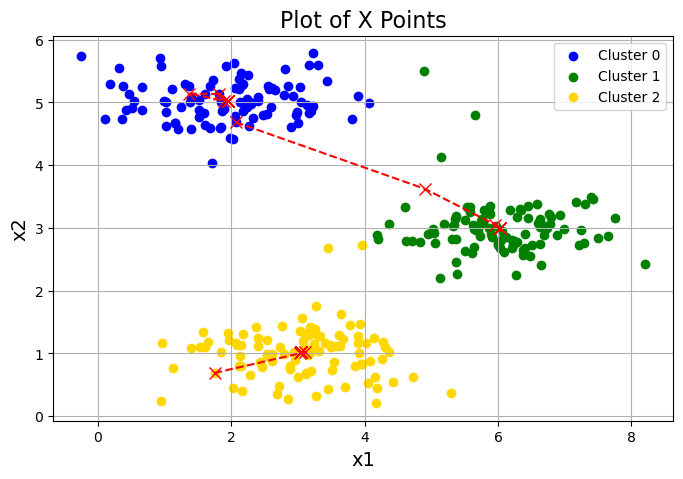

In [44]:
for i in range(3):
    centroids = init_centroids(X, 3)
    idx, centroids_all = run_kmeans(X, centroids, 10)
    plot_data(X, centroids_all, idx)

### 上面运行了三次随机初始化，可以看到不同的随机化，簇中心的演化过程是不一样的，效果基本一致。不排除效果不好的情况。

c:\Users\21620\.conda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 2 2 1]


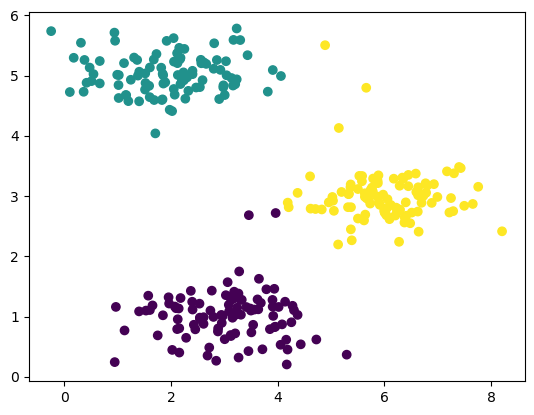

In [45]:
#实际中的案例
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
print(y_pred[0:4])
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 作业，使用ex7data1.mat做k-means分类。
### 步骤：
### 1）读取数据集，查看数据集的大小，绘制数据集.
###  2）运行随机初始化簇中心的函数+k-means分类函数，看最终效果


(50, 2)


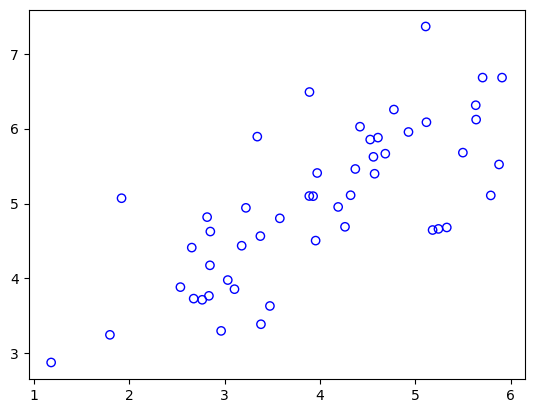

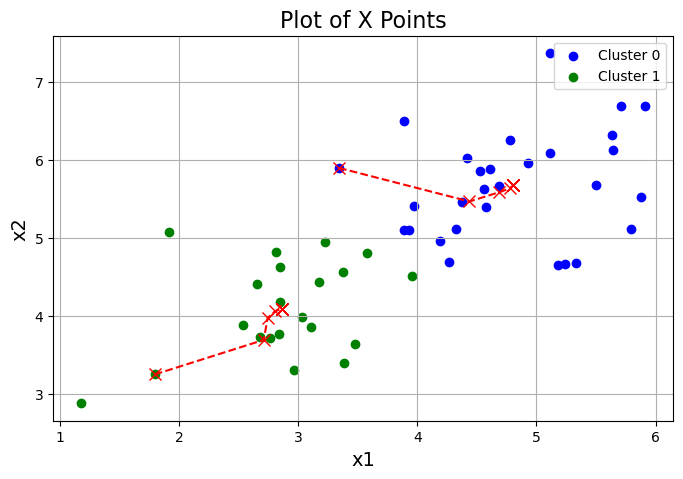

In [48]:
#参考答案
mat = loadmat('ex7data1.mat')
X = mat['X']
print(X.shape)
plt.scatter(X[:,0], X[:, 1], facecolors='none', edgecolors='b')
centroids = init_centroids(X, 2)
idx, centroids_all = run_kmeans(X, centroids, 10)
plot_data(X, centroids_all, idx)

c:\Users\21620\.conda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 1 0 0]


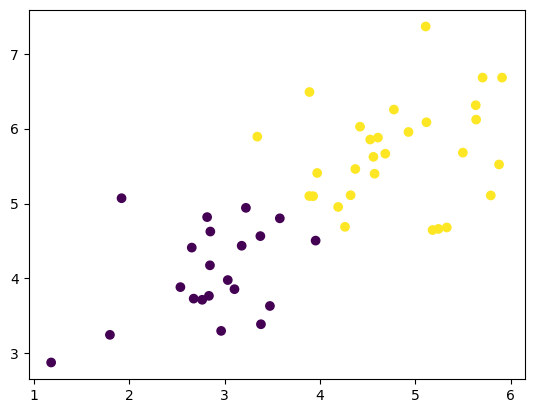

In [51]:
#参考答案
mat = loadmat('ex7data1.mat')
X = mat['X']
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
print(y_pred[0:4])
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

c:\Users\21620\.conda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['red' 'blue' 'red' 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue']


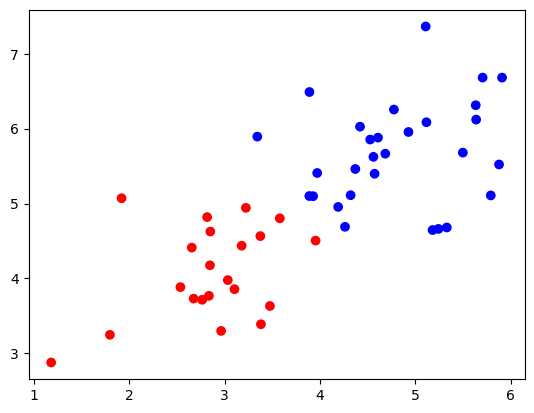

In [53]:
#改进上一个cell程序，使得颜色可以设定
mat = loadmat('ex7data1.mat')
X = mat['X']
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
#修改颜色
y_pred = np.array(y_pred).astype(str)
y_pred2 = y_pred.copy()
y_pred2[y_pred == '0'] = 'red'
y_pred2[y_pred == '1'] = 'blue'
#修改颜色
print(y_pred2[0:10])
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.show()

c:\Users\21620\.conda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['red' 'blue' 'red' 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue']


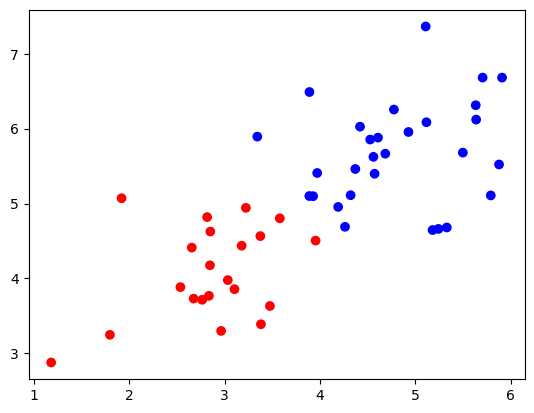

In [54]:
##还可以改进上一个程序，使得制定颜色更为简单一些。给出参考答案
mat = loadmat('ex7data1.mat')
X = mat['X']
n_c = 2
clf = KMeans(n_clusters=n_c, random_state=9)
y_pred = clf.fit_predict(X)
#修改颜色
#补充答案
#修改颜色
print(y_pred2[0:10])
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.show()

In [55]:
##使用Kmeans打印出簇中心和标签。
print (clf.cluster_centers_)

#每个样本所属的簇
print (clf.labels_)

[[2.86434884 4.08286312]
 [4.80385995 5.66897128]]
[0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 0 0 1 0 1 0 0 0 1]




## 1.4 Image compression with K-means
这部分你将用Kmeans来进行图片压缩。在一个简单的24位颜色表示图像。每个像素被表示为三个8位无符号整数(从0到255)，指定了红、绿和蓝色的强度值。这种编码通常被称为RGB编码。

图像深度为24，用R:G:B=8:8:8来表示色彩，则R、G、B各占用8位来表示各自基色分量的强度，每个基色分量的强度等级为2^8=256种。 图像可容纳2^24=16M种色彩 (24位色)。 24位色被称为真彩色，它可以达到人眼分辨的极限

我们的图像包含数千种颜色，在这一部分的练习中，你将把颜色的数量减少到16种颜色。

这可以有效地压缩照片。具体地说，您只需要存储16个选中颜色的RGB值，而对于图中的每个像素，现在只需要将该颜色的索引存储在该位置(只需要4 bits就能表示16种可能性)。

接下来我们要用K-means算法选16种颜色，用于图片压缩。你将把原始图片的每个像素看作一个数据样本，然后利用K-means算法去找分组最好的16种颜色。

### 1.4.1 K-means on pixels

(128, 128, 3)


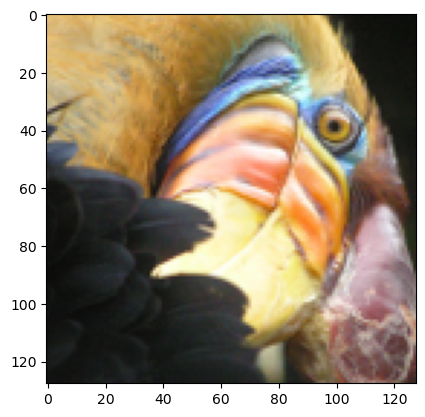

In [58]:
from skimage import io

A = io.imread('bird_small.png')
print(A.shape)
plt.imshow(A)
A = A / 255  # 除以255，使所有值都在0 - 1范围内

In [59]:
X = A.reshape(-1, 3)#reshape(-1,8):表示将数组转换成8列的数组,具体多少行我们不知道,所以参数设为-1
K = 16
clf_img = KMeans(n_clusters=K, random_state=9)
y_pred_img = clf_img.fit_predict(X)
print(y_pred_img[0:4])

[2 2 2 2]


In [60]:
### 理解基本语法，有助于理解下一个函数
img = np.zeros((3,4))
id = np.array([1,0,0])#同样值得注意，np.array很重要
img[id == 0] = 5
img


array([[0., 0., 0., 0.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.]])

In [61]:
y_pred_img.shape

(16384,)

In [62]:
img.shape

(3, 4)

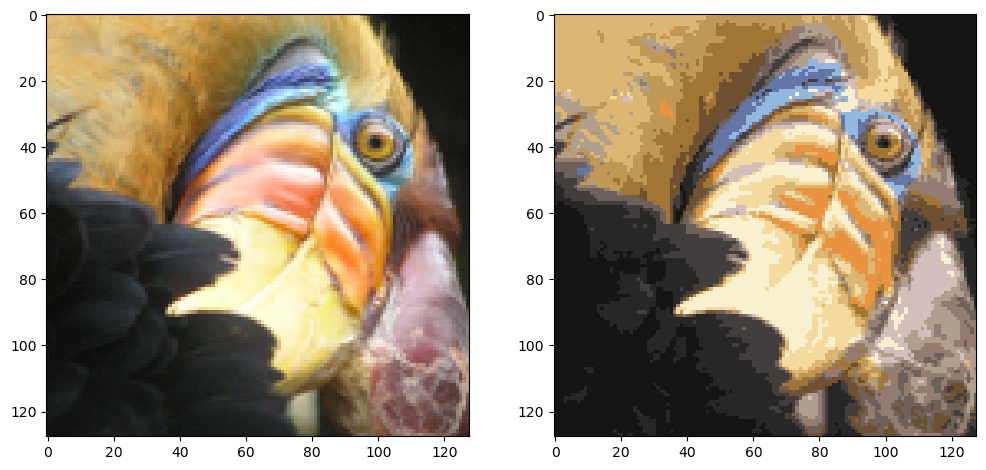

In [63]:
img = np.zeros(X.shape)
centroids = clf_img.cluster_centers_  #取最后一次记录的簇中心的坐标点，一共有16个点，每个点有三个值。
for i in range(len(centroids)):
    #print(idx == i)
    img[y_pred_img == i] = centroids[i]
img = img.reshape((128, 128, 3))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(A)
axes[1].imshow(img)

### 作业：如果把图片xiamen.jpg换成16个色彩和8个色彩和4个色彩。观察到什么现象了呢？

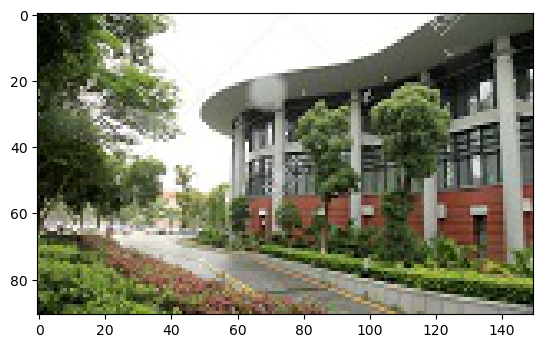

In [65]:
#参考代码：
#读取和处理数据集
A2 = io.imread('xiamen.jpg')
#print(A2.shape)
plt.figure()
plt.imshow(A2)
A2 = np.array(A2)
A2 = A2 / 255  # 除以255，使所有值都在0 - 1范围内
X2 = A2.reshape(-1, 3)#reshape(-1,8):表示将数组转换成8列的数组,具体多少行我们不知道,所以参数设为-1
#设置簇中心个数并求出分类结果
#补充答案。

In [66]:
X2.shape

(13650, 3)

# 2、Principal Component Analysis
这部分，你将运用PCA来实现降维。您将首先通过一个2D数据集进行实验，以获得关于PCA如何工作的直观感受，然后在一个更大的图像数据集上使用它。

## 2.1 Example Dataset
为了帮助您理解PCA是如何工作的，您将首先从一个二维数据集开始，该数据集有一个大的变化方向和一个较小的变化方向。

在这部分练习中，您将看到使用PCA将数据从2D减少到1D时会发生什么。

(50, 2)


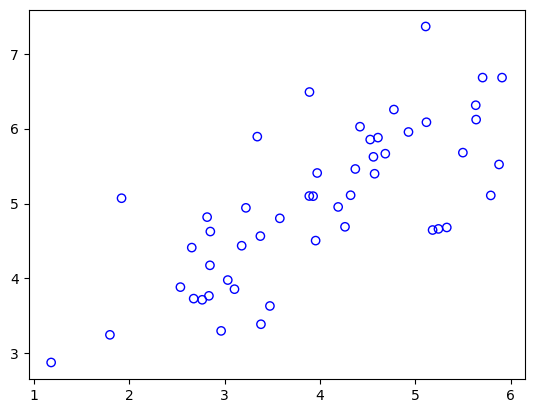

In [67]:
mat = loadmat('ex7data1.mat')
X = mat['X']
print(X.shape)
plt.scatter(X[:,0], X[:, 1], facecolors='none', edgecolors='b')

## 2.2 Implementing PCA
PCA由两部分组成：

* 计算数据的方差矩阵
* 用SVD计算特征向量$(U_1,U_2,...,U_n)$ 

在PCA之前，记得标准化数据。

然后计算方差矩阵，如果你的每条样本数据是以行的形式表示，那么计算公式如下：

$$\Sigma = \frac{1}{m}X^TX $$

接着就可以用SVD计算主成分

$$ [U, S, V] = svd(Sigma) $$

U包含了主成分，每一列就是我们数据要映射的向量，S为对角矩阵，为奇异值。

In [68]:
def feature_normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=1)
    X_norm = (X - means) / stds#标准差标准化，对原始数据标准化
    
    return X_norm, means, stds

由于我们的协方差矩阵为X.T@X, X中每行为一条数据，我们是想要对列(特征)做压缩。

这里由于是对协方差矩阵做SVD(), 所以得到的入口基其实为 V‘，出口基为V，可以打印出各自的shape来判断。

故我们这里是对 数据集的列 做压缩。

In [69]:
def pca(X):#X是标准化的数据
    sigma = (X.T @ X) / len(X)#@矩阵乘法运算符,这个就是特征向量
    U, S, V = np.linalg.svd(sigma)#U*S*V = sigma
    
    return U, S, V

In [70]:
X_norm, means, stds = feature_normalize(X)
U, S, V = pca(X_norm)#
print(U)#特征向量
print(S)#特征值，除了对角元素不为0，其他元素都为0，并且对角元素是从大到小排列的，前面的元素比较大，后面的很多元素接近0。这些对角元素就是奇异值
print(V)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.70081977 0.25918023]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [71]:
#print(means,stds,X_norm)#每个列输出一个平均值，一个方差值

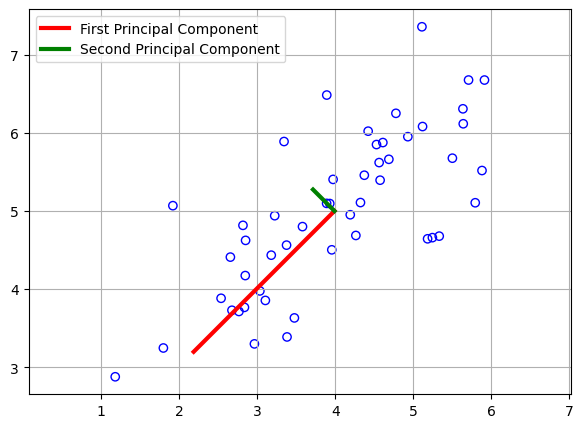

In [72]:
plt.figure(figsize=(7, 5))

plt.scatter(X[:,0], X[:,1], facecolor='none', edgecolors='b')

plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]],
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]],
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')

plt.grid()
# 改变x或y轴的极限，使x和y的增量相等，长度相同
# 不然看着不垂直，不舒服
plt.axis('equal')
plt.legend()

## 2.3 Dimensionality Reduction with PCA
### 2.3.1 Projecting the data onto the principal components

In [73]:
def project_data(X, U, K):#在0-(k-1)个维度上面的投影。
    Z = X @ U[:,:K]
    
    return Z

In [74]:
Z = project_data(X_norm, U, 1)
Z[0]

array([1.48127391])

In [75]:
print(Z.shape,Z[1])


(50, 1) [-0.91291229]


In [76]:
print(X_norm[0],U[:,:1])#对第一个数据X_norm[0]，按着线性关系（也就是第一个成分的向量）计算出来在该成分的分量。

[-0.5180535  -1.57678415] [[-0.70710678]
 [-0.70710678]]


In [77]:
print(X_norm[1],U[:,:1])#对第一个数据X_norm[0]，按着线性关系（也就是第一个成分的向量）计算出来在该成分的分量。

[0.45915361 0.83189934] [[-0.70710678]
 [-0.70710678]]


### 2.3.2 Reconstructing an approximation of the data
重建数据

In [78]:
def recover_data(Z, U, K):#从降维数据恢复高维数据。查看信息损失情况。
    X_rec = Z @ U[:,:K].T
    
    return X_rec

In [79]:
X_rec = recover_data(Z, U, 1)
X_rec[0]

array([-1.04741883, -1.04741883])

### 2.3.3 Visualizing the projections

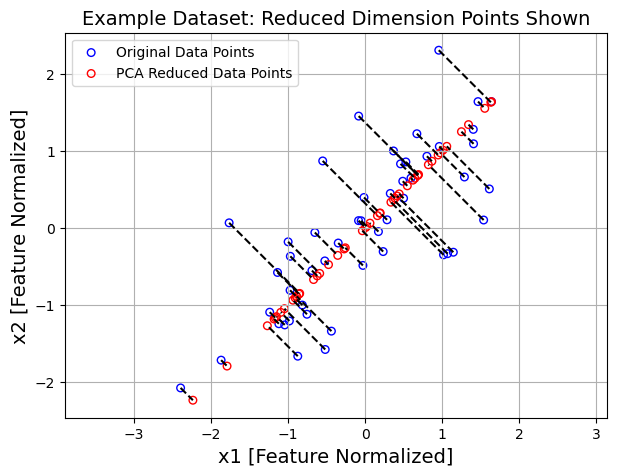

In [80]:
plt.figure(figsize=(7,5))
plt.axis('equal')
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()

## 2.4 Face Image Dataset
在这部分练习中，您将人脸图像上运行PCA，看看如何在实践中使用它来减少维度。

In [82]:
mat = loadmat('ex7faces.mat')
X = mat['X']
print(X.shape)#人脸大小为32*32

FileNotFoundError: [Errno 2] No such file or directory: 'ex7faces.mat'

In [ ]:
def display_data(X, row, col):
    fig, axs = plt.subplots(row, col, figsize=(8,8))
    
    for r in range(row):
        for c in range(col):
            axs[r][c].imshow(X[r*col + c].reshape(32,32).T, cmap='Greys_r')
            axs[r][c].set_xticks([])
            axs[r][c].set_yticks([])

In [ ]:
display_data(X, 10, 10)

### 2.4.1 PCA on Faces

In [ ]:
X_norm, means, stds = feature_normalize(X)

U, S, V = pca(X_norm)

In [ ]:
#U的行数等于数据的列数，才能实现矩阵乘。U截取的列数K-1，就相当于每个点需要得到K-1个值，作为改点在K-1个成分的分量值。

In [ ]:
U.shape, S.shape

In [ ]:
display_data(U[:,:36].T, 6, 6)

### 2.4.2 Dimensionality Reduction

In [ ]:
z = project_data(X_norm, U, K=36)
X_rec = recover_data(z, U, K=36)
display_data(X_rec, 10, 10)

In [ ]:
#我们查看第一个数据，得到的K-1=36-1个分量值。
print(z[0],z[0].shape)

In [ ]:
z = project_data(X_norm, U, K=86)
X_rec = recover_data(z, U, K=86)
display_data(X_rec, 10, 10)

In [ ]:
z = project_data(X_norm, U, K=1000)
X_rec = recover_data(z, U, K=1000)
display_data(X_rec, 10, 10)

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
pca = PCA(n_components=4)

print('Before pca: \n', X[:3,:])#取数据的前面3个样本
pca_1 = PCA(n_components=2) # 指定主成分数量初始化
X_red_1 = pca_1.fit_transform(X) # fit并直接得到降维结果 

# 这里只展示前三行的结果以示对比
print('After pca: \n', X_red_1[:3, :],'\n')
# 查看各个特征值所占的百分比
print('explained_variance_ratio_: ', pca_1.explained_variance_ratio_)
# 线性变换规则
print('components_: ', pca_1.components_)

In [ ]:
plt.figure(figsize=(7,7))    
for i in range(3):
    plt.scatter(x=X_red_1[np.where(y==i),:][0][:,0], y=X_red_1[np.where(y==i),:][0][:,1], alpha=0.8, label='type%s' % i)
plt.legend()
plt.show()

In [ ]:
print('Before pca: \n', X[:3,:])
pca_2 = PCA(0.98)#即保留0.98的信息量（方差）
# 后续的操作都一样，仅仅在初始化上有区别
X_red_2 = pca_2.fit_transform(X)
print('After pca: \n', X_red_2[:3, :],'\n')
print('explained_variance_ratio_: ', pca_2.explained_variance_ratio_)
print('components_: ', pca_2.components_)

In [ ]:
# Fitting PCA
pca = PCA()
pca.fit_transform(X)
# 对所有的保留情况进行累加（1个主成分，2个，...直到和原本数据维度相同
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize = 14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### 总结以看到保留2个或者3个都是很不错的选择；
## 那么以上基本就是sklearn中的pca了。